## Linear Regression with Gradient Descent

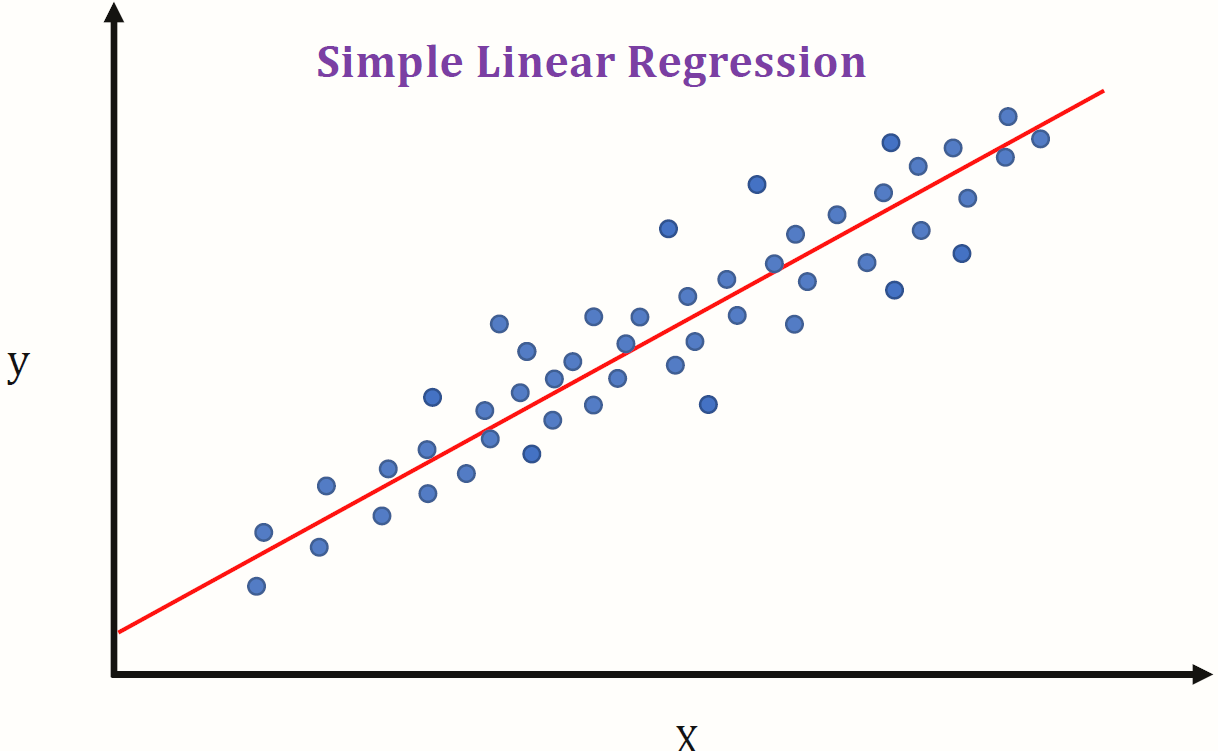

In this example we want to solve a simple linear regression problem with TensorFlow and its custom training loops.

### Define The Model
Here we create a class that defines a one dimensional linear model with its parameters (kernel and bias)

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class Model(object):
  def __init__(self):
    initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=6.)
    self.w = tf.Variable(initializer(shape=()))
    self.b = tf.Variable(initializer(shape=()))

  def __call__(self, x):
    return self.w * x + self.b

model = Model()

### Define The Loss Function
We use the standard L2 loss, also known as the least square errors:

$$MSE = \sum\limits_{i} (y_{pred}^i - y_{target}^i)^2$$

In [10]:
def loss(y_true, y_pred):
  return tf.reduce_mean(tf.square(y_true - y_pred))

### Synthesize the Training Data
We create dataset by using a linear model and an artificial noise

In [3]:
TRUE_w = 3.0
TRUE_b = 2.0
NUM_EXAMPLES = 1000

x  = tf.random.normal(shape=[NUM_EXAMPLES])
noise =  tf.random.normal(shape=[NUM_EXAMPLES])
y = (TRUE_w * x) + TRUE_b + noise


In [4]:
y_pred = model(x)

In [5]:
def plot_data(x, y_true, w, b, y_pred):
    y = (w * x) + b
    plt.plot(x, y_true, 'r.')
    plt.plot(x, y, 'g', label="actual line")
    plt.plot(x, y_pred, 'b', label="predicted line")
    plt.xlabel("x")
    plt.xlabel("y")
    plt.legend()
    plt.axis([0, 2, 0, 8])

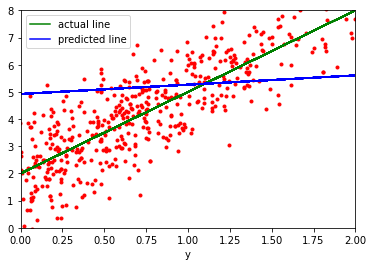

In [6]:
plot_data(x, y, TRUE_w, TRUE_b, y_pred)

### Define the Trainig Loop
With the model and training data, train the model using gradient descent. \
Gradient descent updates the trainable weights w and b to reduce the loss. \


In [8]:
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as t:
        current_loss = loss(model(inputs), outputs)
    dw, db = t.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)

    return current_loss

In [11]:
model = Model()

# Collect the history of W-values and b-values to plot later
list_w, list_b = [], []
epochs = range(20)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, x, y, learning_rate=0.1)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

Epoch  0: w=0.32 b=0.12, loss=11.72489
Epoch  1: w=0.85 b=0.49, loss=7.90274
Epoch  2: w=1.28 b=0.79, loss=5.44781
Epoch  3: w=1.62 b=1.03, loss=3.87092
Epoch  4: w=1.89 b=1.23, loss=2.85796
Epoch  5: w=2.11 b=1.39, loss=2.20721
Epoch  6: w=2.29 b=1.51, loss=1.78914
Epoch  7: w=2.42 b=1.61, loss=1.52053
Epoch  8: w=2.54 b=1.70, loss=1.34793
Epoch  9: w=2.62 b=1.76, loss=1.23703
Epoch 10: w=2.70 b=1.82, loss=1.16576
Epoch 11: w=2.75 b=1.86, loss=1.11996
Epoch 12: w=2.80 b=1.89, loss=1.09052
Epoch 13: w=2.83 b=1.92, loss=1.07160
Epoch 14: w=2.86 b=1.94, loss=1.05944
Epoch 15: w=2.89 b=1.96, loss=1.05163
Epoch 16: w=2.91 b=1.98, loss=1.04660
Epoch 17: w=2.92 b=1.99, loss=1.04337
Epoch 18: w=2.93 b=2.00, loss=1.04130
Epoch 19: w=2.94 b=2.01, loss=1.03996


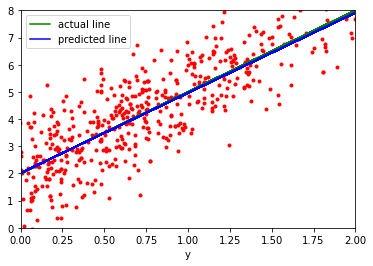

In [12]:
y_pred = model(x)
plot_data(x, y, TRUE_w, TRUE_b, y_pred)

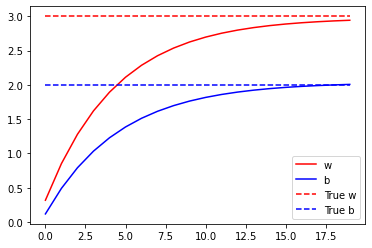

In [13]:
plt.plot(epochs, list_w, 'r',
       epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--',
      [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()